#**`CUSTOMER CHURN ANALYSIS USING MACHINE LEARNING`**

I will be using the Customer Signature for Churn Analysis dataset for this project, and I got this dataset from the enterprise data catalogue, [data.world](https://data.world/bob-wakefield/call-center-data). `Adaryl Bob Wakefield`, a Data Management Expert, provided the dataset. The dataset contains real anonymized telecom customer data from the telecommunication industry.

The marketing research problem I will be researching is `Customer Churn`. `Customer churn` is the process of subscribers switching from one service provider to another which can be voluntary or involuntary.

#**`IMPORTING LIBRARIES`**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**`EXPLORATORY DATA ANALYSIS (EDA)`**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/customer_data_(Churn Analysis).csv")
df.head()

,recordid,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,False,False,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,False,23383607.0
1,2,MT,137,510,False,False,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,False,22550362.0
2,3,OH,103,408,False,True,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,False,59063354.0
3,4,NM,99,415,False,False,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,False,25464504.0
4,5,SC,108,415,False,False,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,False,691824.0


In [ ]:
df.info()
# checking general information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12892 entries, 0 to 12891
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   recordid                       12892 non-null  int64  
 1   state                          12892 non-null  object 
 2   account_length                 12892 non-null  int64  
 3   area_code                      12892 non-null  int64  
 4   international_plan             12892 non-null  bool   
 5   voice_mail_plan                12892 non-null  bool   
 6   number_vmail_messages          12892 non-null  int64  
 7   total_day_minutes              12892 non-null  float64
 8   total_day_calls                12892 non-null  int64  
 9   total_day_charge               12892 non-null  float64
 10  total_eve_minutes              12892 non-null  float64
 11  total_eve_calls                12892 non-null  int64  
 12  total_eve_charge               12892 non-null 

In [ ]:
df.isnull().sum()
# there are no null values in each of the columns

recordid                         0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
customer_id                      0
dtype: int64

In [ ]:
df.shape
# checking dataframe shape

(12892, 22)

In [ ]:
df.dtypes
# checking dataframe column types

recordid                           int64
state                             object
account_length                     int64
area_code                          int64
international_plan                  bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
customer_id                      float64
dtype: object

In [ ]:
df.describe()
# summary statistics on numeric variable types

,recordid,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,customer_id
count,12892.00000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,12892.000000,1.289200e+04
mean,6446.50000,100.676621,437.133804,7.996665,180.162023,100.266599,30.628086,200.711852,100.137139,17.060717,200.557834,100.038241,9.025192,10.244702,4.467654,2.766584,1.563683,2.830245e+11
std,3721.74417,39.806413,42.341820,13.641977,54.207056,19.946657,9.215171,50.781851,19.894032,4.316445,50.632872,19.749714,2.278507,2.782623,2.466493,0.751269,1.310606,3.205835e+13
min,1.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000e+01
25%,3223.75000,73.000000,408.000000,0.000000,144.000000,87.000000,24.480000,166.200000,87.000000,14.130000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,2.409909e+07
50%,6446.50000,100.000000,415.000000,0.000000,180.000000,101.000000,30.600000,201.150000,100.000000,17.095000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,3.219535e+07
75%,9669.25000,127.000000,510.000000,19.000000,216.300000,114.000000,36.770000,234.900000,114.000000,19.970000,235.100000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000,5.535319e+07
max,12892.00000,243.000000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,3.640000e+15


In [ ]:
print("\nFeatures : \n" ,df.columns)
# printing columns to list


Features : 
 Index(['recordid', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'customer_id'],
      dtype='object')


In [ ]:
df["churn"].value_counts()
# counting number of customers who did not churn or churned

False    11069
True      1823
Name: churn, dtype: int64

`11069 Customers did not churn
1823 Customers churned`

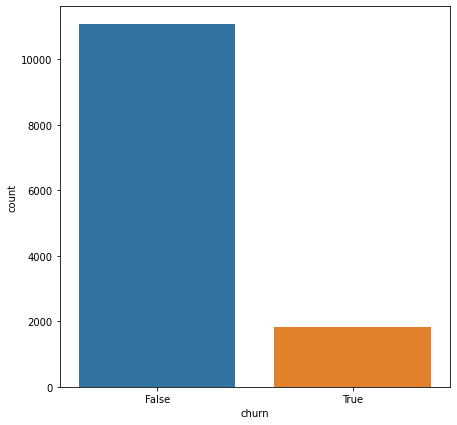

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,7))
sns.countplot(data=df, x='churn')

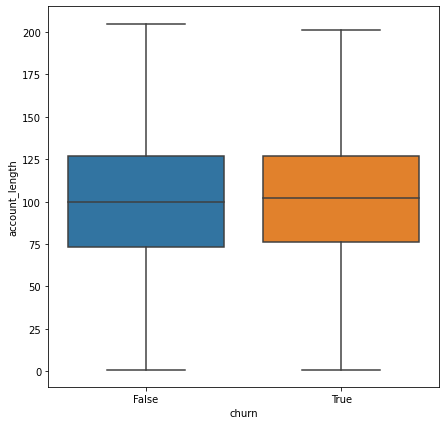

In [ ]:
fig, ax = plt.subplots(1, figsize=(7,7))
sns.boxplot(data=df,
            y='account_length',
            x="churn",
            sym="")

I created the plot above to check if churning had an effect on account lengths. I observed that churn did not have an effect on the length of customers accounts. The spread of the data and median value are identical.

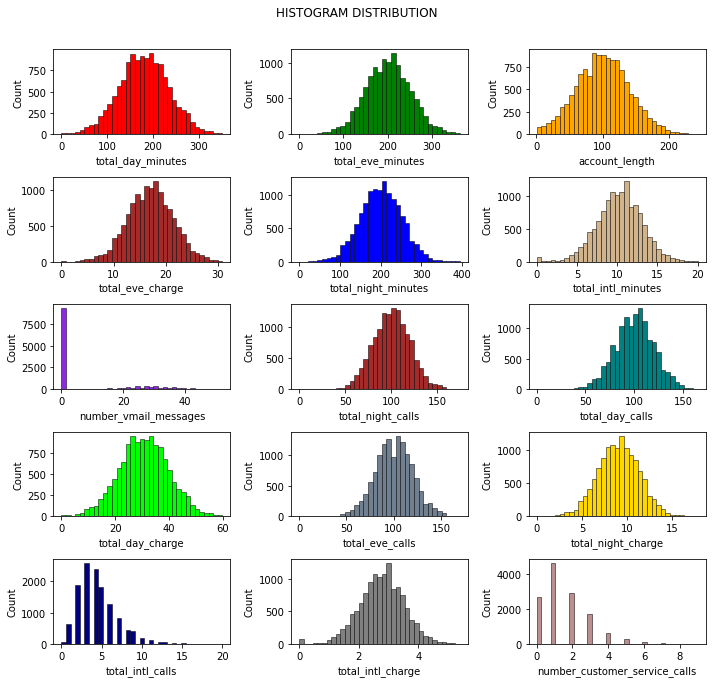

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(10,9))

plt.style.use('ggplot')
#plt.style.use('default')
#print(plt.style.available)

ax[0, 0].hist(df['total_day_minutes'], bins = 35, ec='black', color = "r")

ax[0, 1].hist(df['total_eve_minutes'], bins = 35, ec='black', color = "g")

ax[0, 2].hist(df['account_length'], bins = 35, ec='black', color = "orange")

ax[1, 0].hist(df['total_eve_charge'], bins = 35, ec='black', color = "brown")

ax[1, 1].hist(df['total_night_minutes'], bins = 35, ec='black', color = "b")

ax[1, 2].hist(df['total_intl_minutes'], bins = 35, ec='black',color = "tan")

ax[2, 0].hist(df['number_vmail_messages'], bins = 35, ec='black',color = "blueviolet")

ax[2, 1].hist(df['total_night_calls'], bins = 35, ec='black', color = "brown")

ax[2, 2].hist(df['total_day_calls'], bins = 35, ec='black', color = "teal")

ax[3, 0].hist(df['total_day_charge'], bins = 35, ec='black', color = "lime")

ax[3, 1].hist(df['total_eve_calls'], bins = 35, ec='black', color = "slategray")

ax[3, 2].hist(df['total_night_charge'], bins = 35, ec='black', color = "gold")

ax[4, 0].hist(df['total_intl_calls'], bins = 35, ec='black', color = "navy")

ax[4, 1].hist(df['total_intl_charge'], bins = 35, ec='black', color = "gray")

ax[4, 2].hist(df['number_customer_service_calls'], bins = 35, ec='black', color = "rosybrown")


ax[0, 0].set_xlabel("total_day_minutes")
ax[0, 1].set_xlabel("total_eve_minutes")
ax[0, 2].set_xlabel("account_length")
ax[1, 0].set_xlabel("total_eve_charge")
ax[1, 1].set_xlabel("total_night_minutes")
ax[1, 2].set_xlabel("total_intl_minutes")
ax[2, 0].set_xlabel("number_vmail_messages")
ax[2, 1].set_xlabel("total_night_calls")
ax[2, 2].set_xlabel("total_day_calls")
ax[3, 0].set_xlabel("total_day_charge")
ax[3, 1].set_xlabel("total_eve_calls")
ax[3, 2].set_xlabel("total_night_charge")
ax[4, 0].set_xlabel("total_intl_calls")
ax[4, 1].set_xlabel("total_intl_charge")
ax[4, 2].set_xlabel('number_customer_service_calls')


ax[0, 0].set_ylabel("Count")
ax[0, 1].set_ylabel("Count")
ax[0, 2].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[1, 1].set_ylabel("Count")
ax[1, 2].set_ylabel("Count")
ax[2, 0].set_ylabel("Count")
ax[2, 1].set_ylabel("Count")
ax[2, 2].set_ylabel("Count")
ax[3, 0].set_ylabel("Count")
ax[3, 1].set_ylabel("Count")
ax[3, 2].set_ylabel("Count")
ax[4, 0].set_ylabel("Count")
ax[4, 1].set_ylabel("Count")
ax[4, 2].set_ylabel('Count')

fig.suptitle('HISTOGRAM DISTRIBUTION', y=1.05)

fig.tight_layout()

plt.show()

I made an histogram to check the distribution of the features

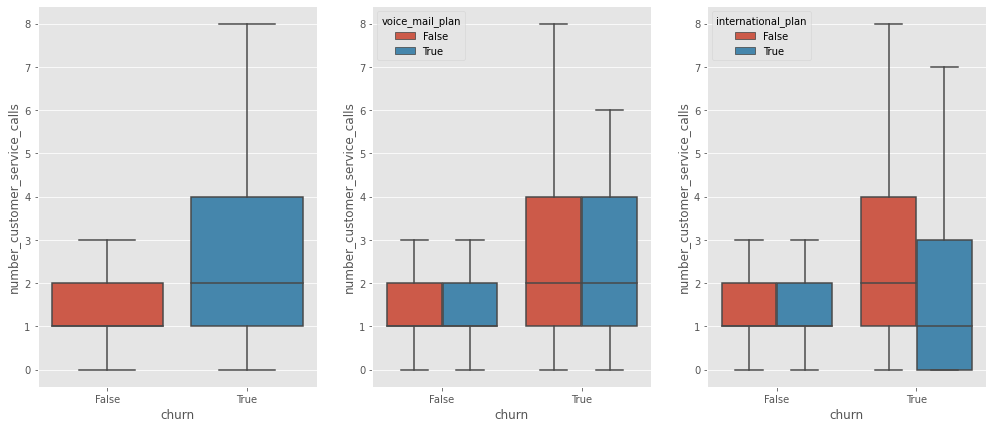

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(17,7))

sns.boxplot(data=df, x='churn', y='number_customer_service_calls', ax=axes[0], sym="")
sns.boxplot(data=df, x='churn', y='number_customer_service_calls', hue="voice_mail_plan", sym="", ax=axes[1])
sns.boxplot(data=df, x='churn', y='number_customer_service_calls',hue="international_plan",sym="", ax=axes[2])

plt.show()

I created the plot above to check if having a voice mail plan or international plan had an effect on the churn rate.I observed that customers who churn left more customer service calls. Furthermore, customers who did not have an international plan or and voice mail plan left more customer service calls compared to those that had an international plan or and voice mail plan.

Having voice mail plans or and international plan did not have an effect on the number of customer service calls for non-churners.



#**`DATA PREPROCESSING`**

In [ ]:
df.dtypes

recordid                           int64
state                             object
account_length                     int64
area_code                          int64
international_plan                  bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
customer_id                      float64
dtype: object

**`ENCODING`**

I `encoded` some of my variables because they are none numeric variables.

In [ ]:
#i will be encoding the variables listed below

print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["churn"].unique())

[False  True]
[False  True]
[False  True]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["international_plan"] = le.fit_transform(df["international_plan"])
df["voice_mail_plan"] = le.fit_transform(df["voice_mail_plan"])
df["churn"] = le.fit_transform(df["churn"])

In [ ]:
print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["churn"].unique())

[0 1]
[0 1]
[0 1]


In [ ]:
df.dtypes

recordid                           int64
state                             object
account_length                     int64
area_code                          int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
customer_id                      float64
dtype: object

`DROPPING COLUMNS`

In [ ]:
df = df.drop(["recordid","customer_id", "state", "area_code"], axis = 1)

In [ ]:
df.columns.tolist()

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

Unique identifiers such as `recordid`, `area_code`, and `customer_id` do not have predicitve power thus they are not pertinent to the analysis.

`CHECKING FOR CORRELATION`

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,0.022895,-0.002168,-0.010158,0.002569,0.033270,0.002567,-0.010764,0.017910,-0.010755,-0.003309,-0.007283,-0.003312,0.006454,0.018648,0.006480,0.000443,0.017597
international_plan,0.022895,1.000000,0.007768,0.011011,0.041294,0.001492,0.041297,0.022844,0.004030,0.022849,-0.028400,0.012858,-0.028409,0.038290,0.017875,0.038231,-0.018568,0.259270
voice_mail_plan,-0.002168,0.007768,1.000000,0.956518,0.000611,-0.006690,0.000609,0.019479,-0.004487,0.019489,0.006599,0.009604,0.006588,0.003200,0.001543,0.003239,-0.015034,-0.102307
number_vmail_messages,-0.010158,0.011011,0.956518,1.000000,0.003265,-0.005302,0.003262,0.014688,-0.003110,0.014701,0.007855,0.001513,0.007841,0.004899,0.008247,0.004926,-0.010377,-0.089688
total_day_minutes,0.002569,0.041294,0.000611,0.003265,1.000000,0.001976,1.000000,-0.000069,0.016816,-0.000080,0.003296,0.016811,0.003277,-0.014108,0.002967,-0.014044,-0.005846,0.205137
total_day_calls,0.033270,0.001492,-0.006690,-0.005302,0.001976,1.000000,0.001976,-0.013697,0.004285,-0.013695,0.016793,-0.016666,0.016786,0.019632,0.004301,0.019735,-0.018455,0.017656
total_day_charge,0.002567,0.041297,0.000609,0.003262,1.000000,0.001976,1.000000,-0.000063,0.016816,-0.000074,0.003298,0.016811,0.003279,-0.014111,0.002965,-0.014046,-0.005851,0.205135
total_eve_minutes,-0.010764,0.022844,0.019479,0.014688,-0.000069,-0.013697,-0.000063,1.000000,-0.004380,1.000000,-0.014478,0.014324,-0.014483,-0.007634,0.006791,-0.007630,-0.011992,0.091400
total_eve_calls,0.017910,0.004030,-0.004487,-0.003110,0.016816,0.004285,0.016816,-0.004380,1.000000,-0.004372,-0.004229,-0.001305,-0.004198,-0.000097,0.012232,-0.000126,0.005333,0.003010
total_eve_charge,-0.010755,0.022849,0.019489,0.014701,-0.000080,-0.013695,-0.000074,1.000000,-0.004372,1.000000,-0.014488,0.014330,-0.014493,-0.007642,0.006791,-0.007638,-0.011999,0.091391


After looking at the correlation map the following features are highly correlated hence one of each have to be dropped this is beacause highly correlated features do not provide additional information, but may increase the complexity of the model, thus increasing the risk of error.

1. number_vmail_messages & voice_mail_plan
2. total_day_charge & total_day_minutes
3. total_eve_charge & total_eve_minutes
4. total_night_charge & total_night_minutes
5. total_int_charge & total_int_minutes

In [ ]:
df = df.drop(["number_vmail_messages","total_day_minutes", "total_eve_minutes", "total_night_charge", "total_intl_charge"], axis = 1)

In [ ]:
df.columns.tolist()

['account_length',
 'international_plan',
 'voice_mail_plan',
 'total_day_calls',
 'total_day_charge',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_intl_minutes',
 'total_intl_calls',
 'number_customer_service_calls',
 'churn']

In [ ]:
df.dtypes

account_length                     int64
international_plan                 int64
voice_mail_plan                    int64
total_day_calls                    int64
total_day_charge                 float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_intl_minutes               float64
total_intl_calls                   int64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [ ]:
df

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,101,0,0,123,12.05,73,18.01,236.0,73,10.6,3,3,0
1,137,0,0,86,38.01,139,20.81,94.2,81,9.5,7,0,0
2,103,0,1,95,50.10,105,20.17,300.3,127,13.7,6,1,0
3,99,0,0,123,36.86,88,10.74,220.6,82,15.7,2,1,0
4,108,0,0,78,33.56,101,10.54,204.5,107,7.7,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12887,25,0,0,98,22.83,109,17.20,195.9,100,12.6,5,2,0
12888,113,0,0,93,36.70,85,20.41,156.7,123,4.9,5,3,0
12889,88,0,1,91,30.87,120,18.12,207.8,104,11.4,4,1,0
12890,120,0,0,97,30.33,113,14.31,120.5,93,9.3,9,1,0


#`USING PYCARET`

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

[REFRENCE](https://www.datacamp.com/tutorial/guide-for-automating-ml-workflows-using-pycaret/)

In [ ]:
#!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.regression import *
s = setup(data = df, target = 'churn')

,Description,Value
0,session_id,3546
1,Target,churn
2,Original Data,"(12892, 13)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9024, 21)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0211,0.0093,0.0956,0.9238,0.0674,0.0733,1.723
rf,Random Forest Regressor,0.0346,0.0119,0.1082,0.9026,0.0758,0.1177,5.107
dt,Decision Tree Regressor,0.0186,0.0186,0.1353,0.8474,0.0938,0.0681,0.151
lightgbm,Light Gradient Boosting Machine,0.0650,0.0233,0.1524,0.8081,0.1052,0.2209,0.233
gbr,Gradient Boosting Regressor,0.1034,0.0400,0.1998,0.6706,0.1384,0.3721,1.206
ada,AdaBoost Regressor,0.2605,0.0920,0.3030,0.2410,0.2289,0.5406,0.208
br,Bayesian Ridge,0.2031,0.0938,0.3062,0.2277,0.2141,0.6621,0.051
ridge,Ridge Regression,0.2030,0.0938,0.3062,0.2276,0.2141,0.6616,0.018
lar,Least Angle Regression,0.2029,0.0938,0.3063,0.2275,0.2141,0.6614,0.036
lr,Linear Regression,0.2029,0.0938,0.3063,0.2275,0.2141,0.6614,0.434


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3546, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


`I used Pycaret above to get an idea of the types of models which could be applied to solve the problem.`

#`MODEL BUILDING`

`SPLITTING DATASET INTO TRAINING AND TESTING`

In [ ]:
X = df.drop('churn', axis = 1) #predictor variable(s)
y = df["churn"] #target varaible

In [ ]:
X.head()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,101,0,0,123,12.05,73,18.01,236.0,73,10.6,3,3
1,137,0,0,86,38.01,139,20.81,94.2,81,9.5,7,0
2,103,0,1,95,50.10,105,20.17,300.3,127,13.7,6,1
3,99,0,0,123,36.86,88,10.74,220.6,82,15.7,2,1
4,108,0,0,78,33.56,101,10.54,204.5,107,7.7,4,2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  #splitting the raw dataset in X_train, X_test, y_train, y_test

In [ ]:
print(f"Shape of X_train after splitting = {X_train.shape}", '\n')
print(f"Shape of X_test after splitting = {X_test.shape}", '\n')
print(f"Shape of y_train after splitting = {y_train.shape}", '\n')
print(f"Shape of y_test after splitting = {y_test.shape}", '\n')

Shape of X_train after splitting = (9024, 12) 

Shape of X_test after splitting = (3868, 12) 

Shape of y_train after splitting = (9024,) 

Shape of y_test after splitting = (3868,) 



**`FEATURE SCALING`**

I performed `Feature scaling` to normalize the range of the features because they have varying degree of magnitude.

In [ ]:
from sklearn.preprocessing import StandardScaler
Ss = StandardScaler()

X_train = Ss.fit_transform(X_train)
X_test = Ss.transform(X_test)

#sklearn standardscaler works by taking the mean of the distribution and then finds the standard deviation for each data point from the mean

In [ ]:
X_train

array([[-2.20745605, -0.3195319 , -0.60585939, ...,  0.59359985,
         0.22196296, -0.42656103],
       [-0.51899304, -0.3195319 , -0.60585939, ..., -0.26269269,
        -0.18647785,  1.10002503],
       [-0.41818928, -0.3195319 ,  1.650548  , ...,  0.98606726,
         5.53169342, -0.42656103],
       ...,
       [-0.51899304, -0.3195319 , -0.60585939, ..., -0.51244468,
        -0.18647785,  0.336732  ],
       [ 0.89225963, -0.3195319 ,  1.650548  , ...,  0.41520557,
         0.22196296,  0.336732  ],
       [-1.32542313, -0.3195319 ,  1.650548  , ...,  3.01976204,
         1.03884456, -1.18985406]])

In [ ]:
X_test

array([[-0.64499774, -0.3195319 , -0.60585939, ..., -0.61948125,
         0.22196296, -1.18985406],
       [-0.51899304, -0.3195319 , -0.60585939, ...,  0.66495756,
        -1.00335946, -0.42656103],
       [ 0.46384364, -0.3195319 , -0.60585939, ..., -0.94059095,
         0.63040376,  1.10002503],
       ...,
       [-0.92220808,  3.12957799, -0.60585939, ...,  0.80767298,
        -0.59491865,  1.10002503],
       [ 1.09386715, -0.3195319 ,  1.650548  , ...,  0.70063641,
        -0.59491865,  0.336732  ],
       [ 0.11103047, -0.3195319 , -0.60585939, ..., -0.26269269,
         0.63040376, -0.42656103]])

**`MODEL TRAINING FOR DIFFERENT ALGORITHMS`**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.9875904860392968


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.9829369183040331


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.8684074457083765


**`MODEL EVALUATION (CONFUSION MATRIX)`**

RANDOM FOREST CLASIFIER
[[3287   11]
 [  37  533]] 

Precision: 0.980 

Accuracy: 0.988 

Recall: 0.935 

f1_score: 0.957 



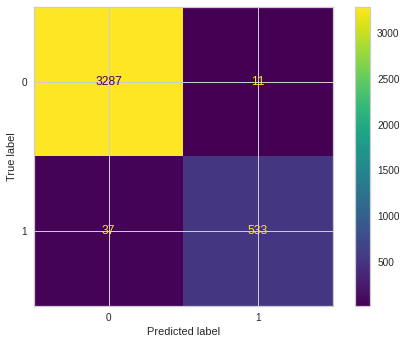

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

y_pred_1 = rfc.predict(X_test)

print('RANDOM FOREST CLASIFIER')
print(confusion_matrix(y_test, y_pred_1), '\n')

print('Precision: %.3f' % precision_score(y_test, y_pred_1), '\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_1), '\n')
print('Recall: %.3f' % recall_score(y_test, y_pred_1), '\n')
print('f1_score: %.3f' % f1_score(y_test, y_pred_1), '\n')

plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

DECISION TREE CLASIFIER
[[3264   34]
 [  32  538]] 

Precision: 0.941 

Accuracy: 0.983 

Recall: 0.944 

f1_score: 0.942 



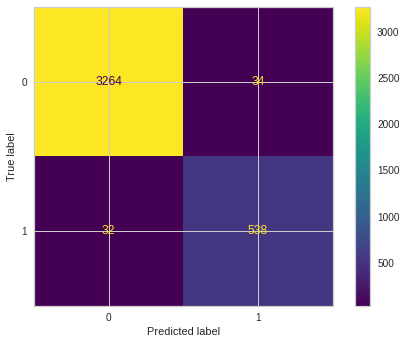

In [ ]:
y_pred_2 = dtc.predict(X_test)
print('DECISION TREE CLASIFIER')
print(confusion_matrix(y_test, y_pred_2), '\n')

print('Precision: %.3f' % precision_score(y_test, y_pred_2), '\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_2), '\n')
print('Recall: %.3f' % recall_score(y_test, y_pred_2), '\n')
print('f1_score: %.3f' % f1_score(y_test, y_pred_2), '\n')

plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

LOGISITC REGRESSION
[[3240   58]
 [ 451  119]] 

Precision: 0.672 

Accuracy: 0.868 

Recall: 0.209 

f1_score: 0.319 



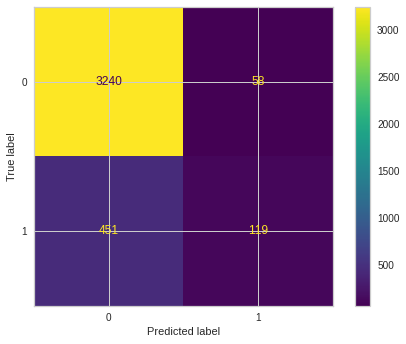

In [ ]:
y_pred_3 = lr.predict(X_test)
print('LOGISITC REGRESSION')
print(confusion_matrix(y_test, y_pred_3), '\n')

print('Precision: %.3f' % precision_score(y_test, y_pred_3), '\n')
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_3), '\n')
print('Recall: %.3f' % recall_score(y_test, y_pred_3), '\n')
print('f1_score: %.3f' % f1_score(y_test, y_pred_3), '\n')

plot_confusion_matrix(lr, X_test, y_test)
plt.show()

#`AGGREGATING MODEL RESULTS`

In [ ]:
from tabulate import tabulate

stayed = [['MACHINE LEARNING ALGORITHMS', 'PRECISION', 'ACCURACY', "RECALL", "F1_SCORE"] ,
          ['RANDOM FOREST CLASIFIER', 0.975, 0.988, 0.946, 0.960],
          ['DECISION TREE CLASIFIER', 0.964, 0.986, 0.942, 0.953],
          ['LOGISITC REGRESSION',     0.672, 0.868, 0.209, 0.319]]

print(tabulate(stayed,headers='firstrow', tablefmt='fancy_grid')) #Stayed

╒═══════════════════════════════╤═════════════╤════════════╤══════════╤════════════╕
│ MACHINE LEARNING ALGORITHMS   │   PRECISION │   ACCURACY │   RECALL │   F1_SCORE │
╞═══════════════════════════════╪═════════════╪════════════╪══════════╪════════════╡
│ RANDOM FOREST CLASIFIER       │       0.975 │      0.988 │    0.946 │      0.96  │
├───────────────────────────────┼─────────────┼────────────┼──────────┼────────────┤
│ DECISION TREE CLASIFIER       │       0.964 │      0.986 │    0.942 │      0.953 │
├───────────────────────────────┼─────────────┼────────────┼──────────┼────────────┤
│ LOGISITC REGRESSION           │       0.672 │      0.868 │    0.209 │      0.319 │
╘═══════════════════════════════╧═════════════╧════════════╧══════════╧════════════╛


From the table above we can conclude that the `RANDOM FOREST CLASSIFER` model is the best model compared to the other two given it's high-level `PRECISION`, `ACCURACY`, `RECALL` and `F1-SCORE`.








#`RECOMMENDATIONS`

I created a new feature total minute, by combining all call minutes made during the day, evening, and night. I observed that customers having voicemail plans made more calls than those who did not. Given this, I would recommend cell providers incentivize their customers to get voicemail plans since increased call times translate to customers spending more money thus increasing revenue.

Furthermore, customers who did not have an international plan spent more time on the phone than those who had. This suggests that having an international plan is not a major driver for customer engagement. I would recommend that service providers divert their resources to other value-added benefits.